In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm 

# DataVisulation

The idea is to merge the train dataset with the stores dataset (type and cluster) and see if there is a correlation
between family, type and cluster and the target sales

## Load train and stores datasets and merge them

In [4]:
#read csv train dataset and stores dataset
data_train = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/train.csv")
data_stores = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/stores.csv")

In [5]:
data_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
data_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [7]:
data_stores[data_stores['cluster'] == 10]

,store_nbr,city,state,type,cluster
25,26,Guayaquil,Guayas,D,10
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
30,31,Babahoyo,Los Rios,B,10
35,36,Libertad,Guayas,E,10
42,43,Esmeraldas,Esmeraldas,E,10


In [8]:
len(data_stores)

54

In [9]:
#merge train dataset and stores dataset
data_train_merge_stores = pd.merge(data_train, data_stores, on="store_nbr")

In [10]:
data_train_merge_stores

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


## Analysis of the merged train and stores dataset

In [11]:
data_train_merge_stores[data_train_merge_stores['family']== 'AUTOMOTIVE'].nunique()

id             90936
date            1684
store_nbr         54
family             1
sales             70
onpromotion        9
city              22
state             16
type               5
cluster           17
dtype: int64

In [12]:
data_train_merge_stores.groupby('family').nunique()

,id,date,store_nbr,sales,onpromotion,city,state,type,cluster
family,,,,,,,,,
AUTOMOTIVE,90936,1684,54,70,9,22,16,5,17
BABY CARE,90936,1684,54,18,2,22,16,5,17
BEAUTY,90936,1684,54,61,11,22,16,5,17
BEVERAGES,90936,1684,54,9778,164,22,16,5,17
BOOKS,90936,1684,54,19,1,22,16,5,17
BREAD/BAKERY,90936,1684,54,39735,97,22,16,5,17
CELEBRATION,90936,1684,54,176,15,22,16,5,17
CLEANING,90936,1684,54,4039,131,22,16,5,17
DAIRY,90936,1684,54,3741,166,22,16,5,17


In [13]:
data_train_merge_stores.groupby('city').nunique().sort_values("sales", ascending = False)

,id,date,store_nbr,family,sales,onpromotion,state,type,cluster
city,,,,,,,,,
Quito,1000296,1684,18,33,191939,253,1,4,10
Guayaquil,444576,1684,8,33,68838,213,1,5,5
Cuenca,166716,1684,3,33,31431,217,1,2,2
Ambato,111144,1684,2,33,27674,214,1,2,2
Santo Domingo,166716,1684,3,33,24815,187,1,3,3
Machala,111144,1684,2,33,20677,178,1,2,2
Daule,55572,1684,1,33,15260,159,1,1,1
Loja,55572,1684,1,33,15025,169,1,1,1
Latacunga,111144,1684,2,33,12472,123,1,1,1


In [14]:
data_train_merge_stores.groupby('cluster').nunique()

,id,date,store_nbr,family,sales,onpromotion,city,state,type
cluster,,,,,,,,,
1,166716,1684,3,33,37536,214,3,2,1
2,111144,1684,2,33,20973,187,1,1,1
3,389004,1684,7,33,37411,223,6,5,1
4,166716,1684,3,33,38101,195,3,3,1
5,55572,1684,1,33,18368,199,1,1,1
6,333432,1684,6,33,53421,172,5,4,1
7,111144,1684,2,33,10040,118,2,2,1
8,166716,1684,3,33,43539,229,1,1,1
9,111144,1684,2,33,26476,190,2,2,1


Conclusion : Let's create a model to forecast the demand of sales for a given family for a given store in a city. Features : City, Store_nbr, Family, On promotion and the target is On promotion

In [15]:
data_train_merge_stores.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
city                22
state               16
type                 5
cluster             17
dtype: int64

In [16]:
data_train_merge_stores.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
city            object
state           object
type            object
cluster          int64
dtype: object

## Create a new column on Data train merge stores with the year

In [17]:
data_train_merge_stores['date'] = pd.to_datetime(data_train_merge_stores['date'])

In [18]:
data_train_merge_stores.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
city                   object
state                  object
type                   object
cluster                 int64
dtype: object

In [19]:
data_train_merge_stores['Year'] = data_train_merge_stores['date'].dt.year

In [20]:
data_train_merge_stores

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,Year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,2013
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2017


In [21]:
data_train_merge_stores.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
city                22
state               16
type                 5
cluster             17
Year                 5
dtype: int64

In [22]:
data_train_merge_stores[data_train_merge_stores["state"] == "Pichincha"].nunique()

id             1055868
date              1684
store_nbr           19
family              33
sales           199540
onpromotion        253
city                 2
state                1
type                 4
cluster             10
Year                 5
dtype: int64

## Analysis per type, cluster and year

In [23]:
#Create a table for each type of stores
data_train_merge_stores_typeA = data_train_merge_stores[data_train_merge_stores["type"] == "A"]
data_train_merge_stores_typeA;

In [24]:
data_train_merge_stores_typeA.nunique()

id             500148
date             1684
store_nbr           9
family             33
sales          109138
onpromotion       253
city                4
state               4
type                1
cluster             4
Year                5
dtype: int64

In [25]:
data_train_merge_stores_typeB = data_train_merge_stores[data_train_merge_stores["type"] == "B"]
data_train_merge_stores_typeB;

In [26]:
data_train_merge_stores_typeB.nunique()

id             444576
date             1684
store_nbr           8
family             33
sales           69757
onpromotion       172
city                6
state               5
type                1
cluster             3
Year                5
dtype: int64

In [27]:
data_train_merge_stores_typeC = data_train_merge_stores[data_train_merge_stores["type"] == "C"]
data_train_merge_stores_typeC;

In [28]:
data_train_merge_stores_typeC.nunique()

id             833580
date             1684
store_nbr          15
family             33
sales           70347
onpromotion       231
city               12
state              11
type                1
cluster             4
Year                5
dtype: int64

In [29]:
data_train_merge_stores_typeD = data_train_merge_stores[data_train_merge_stores["type"] == "D"]
data_train_merge_stores_typeD;

In [30]:
data_train_merge_stores_typeD.nunique()

id             1000296
date              1684
store_nbr           18
family              33
sales           181110
onpromotion        316
city                10
state                9
type                 1
cluster              7
Year                 5
dtype: int64

In [31]:
data_train_merge_stores_typeE = data_train_merge_stores[data_train_merge_stores["type"] == "E"]
data_train_merge_stores_typeE;

In [32]:
data_train_merge_stores_typeE.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
city                   object
state                  object
type                   object
cluster                 int64
Year                    int64
dtype: object

In [33]:
data_train_merge_stores_typeE_2013 = data_train_merge_stores_typeE[data_train_merge_stores_typeE["Year"] == 2013]
data_train_merge_stores_typeE_2013;

In [34]:
data_train_merge_stores_typeE.nunique()

id             222288
date             1684
store_nbr           4
family             33
sales           34111
onpromotion       160
city                3
state               2
type                1
cluster             1
Year                5
dtype: int64

## Analysis to group by type and cluster

In [35]:
#DataFrame groupedby type and sum the sales
data_bytype_sumsales = data_train_merge_stores.groupby('type').agg({'sales': 'sum', 'cluster':'count'})
   #.....:    .reset_index()
   #.....:    .rename(columns={'Organisation Name':'Organisation Count'}) )

In [36]:
data_bytype_sumsales

,sales,cluster
type,,
A,3.530438e+08,500148
B,1.452606e+08,444576
C,1.644347e+08,833580
D,3.510833e+08,1000296
E,5.982244e+07,222288


In [37]:
data_bycluster_sumsales = data_train_merge_stores.groupby('cluster').agg({'sales': 'sum'})
data_bycluster_sumsales

,sales
cluster,
1,5.437675e+07
2,2.891640e+07
3,7.562870e+07
4,4.944344e+07
5,6.208755e+07
6,1.142544e+08
7,1.547812e+07
8,1.079282e+08
9,3.056108e+07


In [38]:
train = pd.read_csv('/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/train.csv',
                    parse_dates = ['date'], infer_datetime_format = True,
                    dtype = {'store_nbr' : 'category',
                             'family' : 'category'},
                    usecols = ['date', 'store_nbr', 'family', 'sales'])
train['date'] = train.date.dt.to_period('D')
train = train.set_index(['date', 'store_nbr', 'family']).sort_index()
train

sales
date       store_nbr family                              
2013-01-01 1         AUTOMOTIVE                     0.000
                     BABY CARE                      0.000
                     BEAUTY                         0.000
                     BEVERAGES                      0.000
                     BOOKS                          0.000
...                                                   ...
2017-08-15 9         POULTRY                      438.133
                     PREPARED FOODS               154.553
                     PRODUCE                     2419.729
                     SCHOOL AND OFFICE SUPPLIES   121.000
                     SEAFOOD                       16.000

[3000888 rows x 1 columns]

In [39]:
train['sales'].sum()

1073644952.2030689

In [40]:
data_train['sales'].sum()

1073644952.2030689

In [41]:
train.sum()

sales    1.073645e+09
dtype: float64

In [42]:
data_train_merge_stores_clean = data_train_merge_stores.drop(columns=['date', 'onpromotion','id'])
data_train_merge_stores_clean_2 = data_train_merge_stores_clean.groupby('store_nbr')['sales'].agg(['sum'])
data_train_merge_stores_clean_2

,sum
store_nbr,
1,1.414501e+07
2,2.155739e+07
3,5.048191e+07
4,1.890970e+07
5,1.559240e+07
6,2.518368e+07
7,2.695205e+07
8,3.049429e+07
9,2.640944e+07


In [43]:
data_train_merge_stores_2 = data_train_merge_stores.set_index(['Year', 'store_nbr', 'family']).sort_index()
data_train_merge_stores_2

id       date  sales  onpromotion       city  \
Year store_nbr family                                                          
2013 1         AUTOMOTIVE        0 2013-01-01    0.0            0      Quito   
               AUTOMOTIVE     1782 2013-01-02    2.0            0      Quito   
               AUTOMOTIVE     3564 2013-01-03    3.0            0      Quito   
               AUTOMOTIVE     5346 2013-01-04    3.0            0      Quito   
               AUTOMOTIVE     7128 2013-01-05    5.0            0      Quito   
...                            ...        ...    ...          ...        ...   
2017 54        SEAFOOD     2993627 2017-08-11    0.0            0  El Carmen   
               SEAFOOD     2995409 2017-08-12    1.0            1  El Carmen   
               SEAFOOD     2997191 2017-08-13    2.0            0  El Carmen   
               SEAFOOD     2998973 2017-08-14    0.0            0  El Carmen   
               SEAFOOD     3000755 2017-08-15    3.0            0  El Carmen   

                               state type  cluster  
Year store_nbr family                               
2013 1         AUTOMOTIVE  Pichincha    D       13  
               AUTOMOTIVE  Pichincha    D       13  
               AUTOMOTIVE  Pichincha    D       13  
               AUTOMOTIVE  Pichincha    D       13  
               AUTOMOTIVE  Pichincha    D       13  
...                              ...  ...      ...  
2017 54        SEAFOOD        Manabi    C        3  
               SEAFOOD        Manabi    C        3  
               SEAFOOD        Manabi    C        3  
               SEAFOOD        Manabi    C        3  
               SEAFOOD        Manabi    C        3  

[3000888 rows x 8 columns]

In [44]:
data_train_merge_stores_2['sales'].sum()

1073644952.2030686

# Create a baseline model and linear model

## Analysis difference between state and city

In [195]:
data_train_merge_stores

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,Year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,2013
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2017


In [46]:
data_train_merge_stores.groupby('state').nunique().sort_values("sales", ascending = False)

,id,date,store_nbr,family,sales,onpromotion,city,type,cluster,Year
state,,,,,,,,,,
Pichincha,1055868,1684,19,33,199540,253,2,4,10,5
Guayas,611292,1684,11,33,91872,222,4,5,5,5
Azuay,166716,1684,3,33,31431,217,1,2,2,5
Tungurahua,111144,1684,2,33,27674,214,1,2,2,5
Santo Domingo de los Tsachilas,166716,1684,3,33,24815,187,1,3,3,5
El Oro,111144,1684,2,33,20677,178,1,2,2,5
Los Rios,111144,1684,2,33,17500,147,2,2,2,5
Manabi,166716,1684,3,33,16623,308,2,3,3,5
Loja,55572,1684,1,33,15025,169,1,1,1,5


In [47]:
data_train_merge_stores.groupby('city').nunique().sort_values("sales", ascending = False)

,id,date,store_nbr,family,sales,onpromotion,state,type,cluster,Year
city,,,,,,,,,,
Quito,1000296,1684,18,33,191939,253,1,4,10,5
Guayaquil,444576,1684,8,33,68838,213,1,5,5,5
Cuenca,166716,1684,3,33,31431,217,1,2,2,5
Ambato,111144,1684,2,33,27674,214,1,2,2,5
Santo Domingo,166716,1684,3,33,24815,187,1,3,3,5
Machala,111144,1684,2,33,20677,178,1,2,2,5
Daule,55572,1684,1,33,15260,159,1,1,1,5
Loja,55572,1684,1,33,15025,169,1,1,1,5
Latacunga,111144,1684,2,33,12472,123,1,1,1,5


In [48]:
data_stores_city_state = data_stores.drop(columns=['store_nbr', 'type','cluster'])
data_stores_city_state.nunique() #22 city and 16 states
data_stores_city_state.sort_values('state')

,city,state
41,Cuenca,Azuay
38,Cuenca,Azuay
36,Cuenca,Azuay
18,Guaranda,Bolivar
13,Riobamba,Chimborazo
12,Latacunga,Cotopaxi
11,Latacunga,Cotopaxi
40,Machala,El Oro
39,Machala,El Oro
42,Esmeraldas,Esmeraldas


In [125]:
data_stores_city_state['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [204]:
data_train_merge_stores['month'] = data_train_merge_stores['date'].dt.month
data_train_merge_stores['year'] = data_train_merge_stores['date'].dt.year
data_train_merge_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,Year,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2013,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2013,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2013,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,2013,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,2013,1,2013


## Create baseline dataframe

In [50]:
data_train_merge_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,Year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,2013


In [51]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data_baseline.corr(), 
 #           cmap='coolwarm', 
  #          annot = True, 
   #         annot_kws={"size": 10})

In [52]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data_train_merge_stores.corr(), 
 #           cmap='coolwarm', 
  #          annot = True, 
   #         annot_kws={"size": 10})

In [53]:
#Encode city Column
#labelencoder_X = LabelEncoder()
#data_baseline.loc[:,'city_code'] = labelencoder_X.fit_transform(data_baseline.loc[:,'city'])
#data_baseline.head()
#ct = ColumnTransformer([("city", OneHotEncoder(), [0])], remainder = 'passthrough')
#test = ct.fit_transform(data_baseline)
#test

In [54]:
#data_baseline['city'].unique()

In [55]:
#data_baseline['city_code'].unique()

In [56]:
#data_baseline.loc[:,'state_code'] = labelencoder_X.fit_transform(data_baseline.loc[:,'state'])
#data_baseline.head()

In [57]:
#data_baseline['state'].unique()

In [58]:
#data_baseline['state_code'].unique()

In [59]:
#data_baseline.loc[:,'family_code'] = labelencoder_X.fit_transform(data_baseline.loc[:,'family'])
#data_baseline.head()

In [60]:
#data_baseline['family'].unique()

In [61]:
#data_baseline['family_code'].unique()

In [62]:
#data_baseline_LabelEncoder = data_baseline.drop(columns = ['family','city','state'])
#data_baseline_LabelEncoder.head()

In [63]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data_baseline_LabelEncoder.corr(), 
#            cmap='coolwarm', 
 #           annot = True, 
 #           annot_kws={"size": 10})

In [64]:
#data_train_merge_stores.loc[:,'family_code'] = labelencoder_X.fit_transform(data_train_merge_stores.loc[:,'family'])
#data_train_merge_stores.loc[:,'city_code'] = labelencoder_X.fit_transform(data_train_merge_stores.loc[:,'city'])
#data_train_merge_stores.loc[:,'state_code'] = labelencoder_X.fit_transform(data_train_merge_stores.loc[:,'state'])
#data_train_merge_stores.loc[:,'type_code'] = labelencoder_X.fit_transform(data_train_merge_stores.loc[:,'type'])

In [65]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data_train_merge_stores.corr(), 
 #           cmap='coolwarm', 
  #          annot = True, 
   #         annot_kws={"size": 10})

In [66]:
#data_train_merge_stores = data_train_merge_stores.drop(columns = ['family_code', 'city_code', 'type_code','state_code'])
#data_train_merge_stores

In [67]:
data_baseline = data_train_merge_stores.drop(columns = ['id','type','cluster'])
data_baseline

,date,store_nbr,family,sales,onpromotion,city,state,Year
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,2013
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,2013
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,2013
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,2013
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,2013
...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,2017
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,2017
3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,2017
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,2017


In [68]:
data_baseline['month'] = data_baseline['date'].dt.month
data_baseline

,date,store_nbr,family,sales,onpromotion,city,state,Year,month
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,2013,1
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,2013,1
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,2013,1
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,2013,1
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,2013,1
...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,2017,8
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,2017,8
3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,2017,8
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,2017,8


In [69]:
data_baseline = data_baseline.groupby(["Year","month","family","store_nbr"]).sum().reset_index()

In [70]:
data_baseline.head()

,Year,month,family,store_nbr,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,68.0,0
1,2013,1,AUTOMOTIVE,2,107.0,0
2,2013,1,AUTOMOTIVE,3,186.0,0
3,2013,1,AUTOMOTIVE,4,120.0,0
4,2013,1,AUTOMOTIVE,5,134.0,0


## OneHotEncode Columns year, month, family and store_nbr and use the log on sales for the outliers

In [98]:
data_baseline

,Year,month,family,store_nbr,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,68.000000,0
1,2013,1,AUTOMOTIVE,2,107.000000,0
2,2013,1,AUTOMOTIVE,3,186.000000,0
3,2013,1,AUTOMOTIVE,4,120.000000,0
4,2013,1,AUTOMOTIVE,5,134.000000,0
...,...,...,...,...,...,...
99787,2017,8,SEAFOOD,50,294.618001,11
99788,2017,8,SEAFOOD,51,767.296000,11
99789,2017,8,SEAFOOD,52,137.227000,7
99790,2017,8,SEAFOOD,53,68.000000,7


In [99]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False )
data_baseline_OneHot = enc.fit_transform(data_baseline[['Year','month','family','store_nbr']])
array_columns_names = enc.get_feature_names()
data_baseline_OneHot = pd.DataFrame(data_baseline_OneHot,columns = array_columns_names)
data_baseline_OneHot['sales'] = data_baseline['sales']
data_baseline_OneHot['onpromotion'] = data_baseline['onpromotion']
data_baseline_OneHot

/Users/farahboukitab/.pyenv/versions/3.8.13/envs/business_case_869/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x1_1,x1_2,x1_3,x1_4,x1_5,...,x3_47,x3_48,x3_49,x3_50,x3_51,x3_52,x3_53,x3_54,sales,onpromotion
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.000000,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.000000,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.000000,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,294.618001,11
99788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,767.296000,11
99789,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,137.227000,7
99790,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,68.000000,7


In [100]:
data_baseline_OneHot['sales'].describe()

count     99792.000000
mean      10758.827884
std       31388.925081
min           0.000000
25%           5.000000
50%         370.000000
75%        6147.000000
max      473316.000000
Name: sales, dtype: float64

In [101]:
#Change 0 to 0.1 to use the log
data_baseline_OneHot.loc[data_baseline_OneHot['sales']== 0,'sales'] = 0.1
#log_data_baseline_3 = np.log(data_baseline_3['sales'])
#plt.hist(log_data_baseline_3,bins=100)

In [102]:
data_baseline_OneHot['sales'].describe()

count     99792.000000
mean      10758.851592
std       31388.916955
min           0.100000
25%           5.000000
50%         370.000000
75%        6147.000000
max      473316.000000
Name: sales, dtype: float64

In [103]:
data_baseline_OneHot[data_baseline_OneHot['sales'] == 0.1]

,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x1_1,x1_2,x1_3,x1_4,x1_5,...,x3_47,x3_48,x3_49,x3_50,x3_51,x3_52,x3_53,x3_54,sales,onpromotion
19,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
21,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
28,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
35,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99715,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
99716,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
99720,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0
99723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0


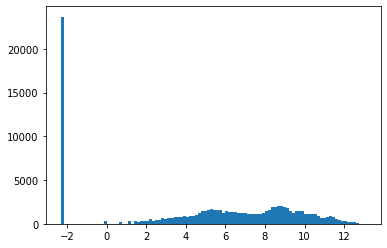

In [76]:
log_sales = np.log(data_baseline_OneHot['sales'])
plt.hist(log_sales,bins=100);

In [104]:
data_baseline_OneHot

,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x1_1,x1_2,x1_3,x1_4,x1_5,...,x3_47,x3_48,x3_49,x3_50,x3_51,x3_52,x3_53,x3_54,sales,onpromotion
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.000000,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.000000,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.000000,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,294.618001,11
99788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,767.296000,11
99789,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,137.227000,7
99790,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,68.000000,7


In [77]:
log_data_baseline_OneHot = data_baseline_OneHot

In [78]:
log_data_baseline_OneHot['sales'] = log_sales

In [105]:
log_data_baseline_OneHot

,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x1_1,x1_2,x1_3,x1_4,x1_5,...,x3_47,x3_48,x3_49,x3_50,x3_51,x3_52,x3_53,x3_54,sales,onpromotion
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.219508,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672829,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.225747,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.787492,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.897840,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.685680,11
99788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.642873,11
99789,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.921636,7
99790,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.219508,7


In [79]:
#data_baseline_2[data_baseline_2['city'] == 'Quito']

In [80]:
#plt.figure(figsize = (10,10))
#sns.heatmap(data_baseline_3.corr(), 
 #           cmap='coolwarm', 
  #          annot = True, 
   #         annot_kws={"size": 10})

## Create a baseline model - Linear Regression with normal values on sales => Score of 0.66

In [106]:
data_X = data_baseline_OneHot.drop(columns = 'sales')
data_y = data_baseline_OneHot['sales']

In [107]:
baseline_OneHot_Model = sm.OLS(data_X,data_y).fit()

In [108]:
data_baseline_OneHot.head()

,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x1_1,x1_2,x1_3,x1_4,x1_5,...,x3_47,x3_48,x3_49,x3_50,x3_51,x3_52,x3_53,x3_54,sales,onpromotion
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0


In [109]:
#baseline_model.summary() #Don't do it too many lines and Kernel will die

In [115]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression().fit(data_X, data_y)
LinearRegression.score(data_X, data_y)

0.6655112734687326

## Create a baseline model - Linear Regression with log on sales => Score of 0.69

In [111]:
log_data_baseline_OneHot.head()

,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x1_1,x1_2,x1_3,x1_4,x1_5,...,x3_47,x3_48,x3_49,x3_50,x3_51,x3_52,x3_53,x3_54,sales,onpromotion
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.219508,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672829,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.225747,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.787492,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.897840,0


In [112]:
data_log_X = log_data_baseline_OneHot.drop(columns = 'sales')
data_log_y = log_data_baseline_OneHot['sales']

In [113]:
log_baseline_OneHot_Model = sm.OLS(data_log_X,data_log_y).fit()

In [116]:
from sklearn.linear_model import LinearRegression
LinearRegression_logData = LinearRegression().fit(data_log_X, data_log_y)
LinearRegression_logData.score(data_log_X, data_log_y)

0.6927085965337291

## Create a baseline model - Logistic Regression with normal values on sales => Score of ???? => Ask tomorrow Thierry why LogisticRegression is not working

In [89]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import cross_validate

#logisticRegr = LogisticRegression(max_iter = 1000)
#cv_results = cross_validate(logisticRegr, data_X, data_y, cv=5)
#cv_results

In [90]:
#LogisticRegression = logisticRegr.fit(data_X_NonOnHot, data_y_NonOnHot)
#LogisticRegression.score(data_X, data_y)

In [315]:
data_plot = data_train_merge_stores
data_plot

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,Year,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,2013,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,2013,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,2013,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,2013,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,2013,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2017,8,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2017,8,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2017,8,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2017,8,2017


In [316]:
data_baseline = data_plot

In [319]:
#2013
data_selection_fam_2013_bycity_bystore = data_baseline[data_baseline['year'] == 2013]
data_selection_fam_2013_bycity_bystore = data_selection_fam_2013_bycity_bystore[
    data_selection_fam_2013_bycity_bystore['city'] == 'Guayaquil']
data_selection_fam_2013_bycity_bystore = data_selection_fam_2013_bycity_bystore[
    data_selection_fam_2013_bycity_bystore['store_nbr'] == 24]
data_selection_fam_2013_bycity_bystore = data_selection_fam_2013_bycity_bystore.groupby(['family'])['sales'].sum().reset_index()

#2014
data_selection_fam_2014_bycity_bystore = data_baseline[data_baseline['year'] == 2014]
data_selection_fam_2014_bycity_bystore = data_selection_fam_2014_bycity_bystore[
    data_selection_fam_2014_bycity_bystore['city'] == 'Guayaquil']
data_selection_fam_2014_bycity_bystore = data_selection_fam_2014_bycity_bystore[
    data_selection_fam_2014_bycity_bystore['store_nbr'] == 24]
data_selection_fam_2014_bycity_bystore = data_selection_fam_2014_bycity_bystore.groupby(['family'])['sales'].sum().reset_index()

#2015
data_selection_fam_2015_bycity_bystore = data_baseline[data_baseline['year'] == 2015]
data_selection_fam_2015_bycity_bystore = data_selection_fam_2015_bycity_bystore[
    data_selection_fam_2015_bycity_bystore['city'] == 'Guayaquil']
data_selection_fam_2015_bycity_bystore = data_selection_fam_2015_bycity_bystore[
    data_selection_fam_2015_bycity_bystore['store_nbr'] == 24]
data_selection_fam_2015_bycity_bystore = data_selection_fam_2015_bycity_bystore.groupby(['family'])['sales'].sum().reset_index()

#2016
data_selection_fam_2016_bycity_bystore = data_baseline[data_baseline['year'] == 2016]
data_selection_fam_2016_bycity_bystore = data_selection_fam_2016_bycity_bystore[
    data_selection_fam_2016_bycity_bystore['city'] == 'Guayaquil']
data_selection_fam_2016_bycity_bystore = data_selection_fam_2016_bycity_bystore[
    data_selection_fam_2016_bycity_bystore['store_nbr'] == 24]
data_selection_fam_2016_bycity_bystore = data_selection_fam_2016_bycity_bystore.groupby(['family'])['sales'].sum().reset_index()

In [321]:
data_selection_fam_2013_bycity_bystore.describe()

,sales
count,3.300000e+01
mean,1.123723e+05
std,2.678523e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.002000e+03
75%,8.443600e+04
max,1.374572e+06


In [322]:
data_selection_fam_2014_bycity_bystore.describe()

,sales
count,33.000000
mean,118943.670519
std,242474.427877
min,0.000000
25%,2164.000000
50%,5879.000000
75%,69482.000000
max,983788.000000


In [323]:
data_selection_fam_2015_bycity_bystore.describe()

,sales
count,3.300000e+01
mean,1.696202e+05
std,3.440365e+05
min,0.000000e+00
25%,2.479000e+03
50%,1.601662e+04
75%,1.105870e+05
max,1.484756e+06


In [324]:
data_selection_fam_2016_bycity_bystore.describe()

,sales
count,3.300000e+01
mean,1.963141e+05
std,4.132663e+05
min,3.100000e+01
25%,4.676000e+03
50%,1.340809e+04
75%,1.116100e+05
max,1.556595e+06


In [10]:
# Load csv dataset
data_train = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/train.csv")
data_stores = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/stores.csv")

df_heatmap = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/Heatmap.csv")
df_heatmap.rename(columns = {'Unnamed: 0':'city', 'Unnamed: 1':'Lat', 'Unnamed: 2':'Lon', 'Unnamed: 3':'Weight'}, inplace = True)
df_heatmap.drop([0], axis=0, inplace=True)

# merge train dataset and stores dataset
data_train_merge_stores = pd.merge(data_train, data_stores, on="store_nbr")
data_train_merge_stores['date'] = pd.to_datetime(data_train_merge_stores['date'])

#merge train dataset and stores dataset with heatmap
map_base = pd.merge(data_train_merge_stores, df_heatmap, on='city').drop(columns=['Weight', 'type', 'cluster', 'state', 'onpromotion'])
map_base['date'] = pd.to_datetime(map_base['date'])
map_base['month'] = map_base['date'].dt.month
map_base['year'] = map_base['date'].dt.year
map_base = map_base.drop(map_base[map_base['year']==2017].index, axis=0, inplace=False)
map_base['Lat'] = pd.to_numeric(map_base['Lat'])
map_base['Lon'] = pd.to_numeric(map_base['Lon'])
sales_city_year = pd.DataFrame(map_base.groupby(['city', 'Lat', 'Lon'])['sales'].sum()).reset_index().sort_values(by='sales', ascending=False)

# Create baseline dataset
#data_baseline = data_train_merge_stores
#data_baseline['month'] = data_baseline['date'].dt.month
#data_baseline['year'] = data_baseline['date'].dt.year
#data_baseline = data_baseline[data_baseline['year']<2017]

#Create dataframe for top 5 cities
map_base_top_five = map_base[map_base['city'].isin(['Quito', 'Guayaquil', 'Cuenca', 'Ambato', 'Santo Domingo'])]
map_base_top_five = pd.DataFrame(map_base_top_five.groupby(['city', 'year'])['sales'].sum()).reset_index().sort_values(by=[ 'year','sales', 'city' ], ascending=[True,False , True])
map_base_top_five['year'] = map_base_top_five['year'].astype('string')

In [14]:
sales_city_year

,city,Lat,Lon,sales
18,Quito,-0.178352,-78.458790,4.583833e+08
8,Guayaquil,-2.190046,-79.895917,1.011440e+08
3,Cuenca,-2.900436,-79.007929,3.917825e+07
0,Ambato,-1.254569,-78.622993,3.348328e+07
21,Santo Domingo,-0.257319,-79.175208,2.908289e+07
13,Machala,-3.197790,-79.885070,2.693674e+07
2,Cayambe,0.042666,-78.145627,2.370083e+07
10,Latacunga,-0.933562,-78.614404,1.781325e+07
12,Loja,-3.994921,-79.203467,1.585401e+07
4,Daule,-1.861665,-79.977583,1.568099e+07


In [18]:
df_stores_city = pd.DataFrame(data_stores.groupby(['city'])['store_nbr'].count())
df_stores_city = df_stores_city.reset_index().sort_values(by='store_nbr', ascending=False)
df_stores_city

,city,store_nbr
18,Quito,18
8,Guayaquil,8
21,Santo Domingo,3
3,Cuenca,3
14,Manta,2
13,Machala,2
10,Latacunga,2
0,Ambato,2
7,Guaranda,1
9,Ibarra,1


In [29]:
data_train_merge_stores['sales'].sum()

1073644952.2030689

In [36]:
df_top5Stores = data_train_merge_stores.groupby(['store_nbr','city'])['sales'].sum()
df_top5Stores = pd.DataFrame(df_top5Stores).reset_index().sort_values('sales',ascending = False)
df_top5Stores.describe()

,store_nbr,sales
count,54.000000,5.400000e+01
mean,27.500000,1.988231e+07
std,15.732133,1.329537e+07
min,1.000000,2.696170e+06
25%,14.250000,1.109715e+07
50%,27.500000,1.599205e+07
75%,40.750000,2.482969e+07
max,54.000000,6.208755e+07


In [34]:
df_top5Stores['sales'].sum()

1073644952.2030684

In [37]:
df_top5Stores

,store_nbr,city,sales
43,44,Quito,6.208755e+07
44,45,Quito,5.449801e+07
46,47,Quito,5.094831e+07
2,3,Quito,5.048191e+07
48,49,Quito,4.342010e+07
45,46,Quito,4.189606e+07
47,48,Quito,3.593313e+07
50,51,Guayaquil,3.291149e+07
7,8,Quito,3.049429e+07
49,50,Ambato,2.865302e+07
